<a href="https://colab.research.google.com/github/electrojam/Curso-de-Clustering-con-Python-y-scikit-learn/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Customer Personality Analysis
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

Ayuda

https://deepnote.com/app/aazg/Clustering-of-Customer-Personality-Analysis-476ba5e6-eb90-4a9a-8755-c06626d1ab4d

https://www.kaggle.com/code/yesidjurardo/customer-personality-analysis

### Importar librerías

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Preparar datos

In [289]:
df_customer = pd.read_csv('marketing_campaign.csv', sep='\t')
df_customer.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [290]:
df_customer.shape

(2240, 29)

In [291]:
df_customer.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [292]:
df_customer.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### Manejando valores nulos

In [293]:
# Revisamos si hay valores nulos en el df
df_customer.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [294]:
# Para objetivo del reto eliminamos los valores nulos
df_proc = df_customer.dropna()
print(df_proc.shape, '\n')
print(df_proc.isnull().sum())


(2216, 29) 

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


### Validamos duplicados

In [295]:
df_proc[df_proc.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


### Encoding

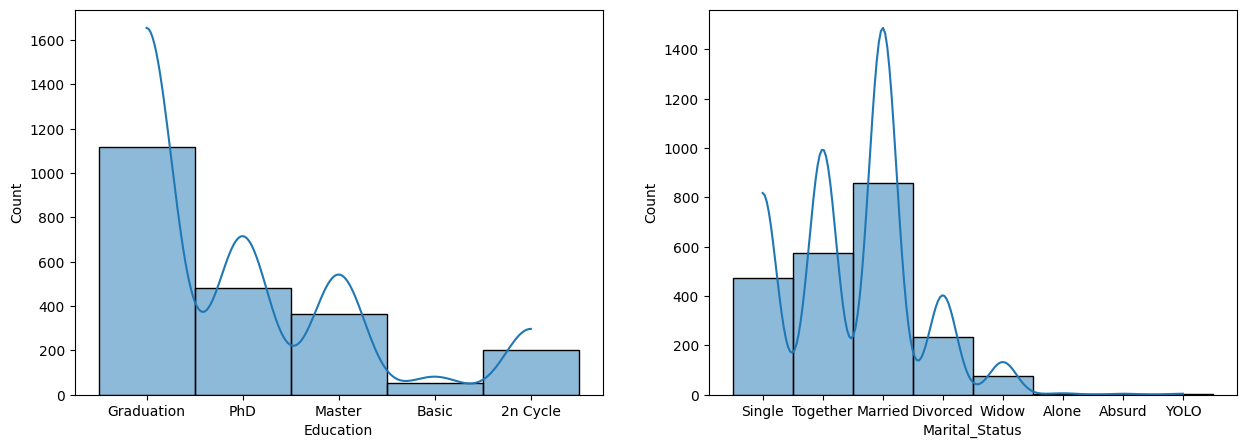

In [296]:
# Visualizaremos frecuencia en un histplot de variables categóricas
var_cat = df_proc.select_dtypes(include=['object', 'category']).columns
var_cat = var_cat.drop('Dt_Customer') # no tenemos en cuenta variable categ Dt_Customer

fig, ax = plt.subplots(1, len(var_cat), figsize=(15,5))
for i, cat in enumerate(var_cat):
  sns.histplot(data=df_proc, x=cat, kde=True, ax=ax[i])



Para codificar variables categóricas Education y Marital_Status lo haremos manual

In [297]:
df_proc['Education'] = df_proc['Education'].replace({'Basic':0, '2n Cycle':1, 'Graduation':2, 'Master':3, 'PhD':4})
df_proc['Marital_Status'] = df_proc['Marital_Status'].apply(
    lambda x: 1 if x in ['Married', 'Together'] else 0
)

<ipython-input-297-c2cae9e17048>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proc['Education'] = df_proc['Education'].replace({'Basic':0, '2n Cycle':1, 'Graduation':2, 'Master':3, 'PhD':4})
<ipython-input-297-c2cae9e17048>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proc['Marital_Status'] = df_proc['Marital_Status'].apply(


In [298]:
print(df_proc['Education'].value_counts(), '\n')
print(df_proc['Marital_Status'].value_counts(), '\n')

Education
2    1116
4     481
3     365
1     200
0      54
Name: count, dtype: int64 

Marital_Status
1    1430
0     786
Name: count, dtype: int64 



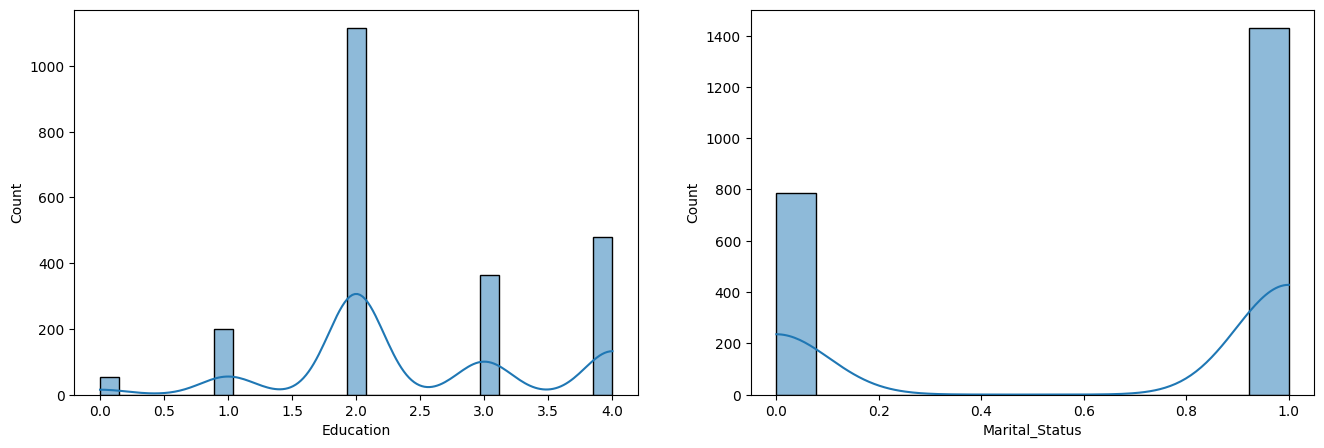

In [299]:
# Graficamos Education y Marital_Status
fig, ax = plt.subplots(1, len(var_cat), figsize=(16,5))
for i, cat in enumerate(var_cat):
  sns.histplot(data=df_proc, x=cat, kde=True, ax=ax[i])

Convertimos Dt_Customer a formato día-mes-año

In [300]:
df_proc['Dt_Customer'] = pd.to_datetime(df_proc['Dt_Customer'], format='%d-%m-%Y')
df_proc['Dt_Customer'].head()

<ipython-input-300-415549afb340>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proc['Dt_Customer'] = pd.to_datetime(df_proc['Dt_Customer'], format='%d-%m-%Y')


0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

Eliminamos variables que no son útiles

- Id porque es irrelevante

- Z_CostContact	Z_Revenue porque su std es igual a 0

In [301]:
df_proc.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

<ipython-input-301-b8582991b88c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proc.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)


En lugar de Year_Birth crearemos variable numérica Age edad, tomando como año actual el año del 2014, en el que fue creado el dataset 'Customer Personality Analysis'.

Luego de esto procedemos a eliminar la variable Year_Birth

In [302]:
df_proc['Age'] = 2014-df_proc['Year_Birth']

<ipython-input-302-7ae01304d092>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proc['Age'] = 2014-df_proc['Year_Birth']


In [303]:
df_proc.drop(['Year_Birth'], axis=1, inplace=True)

<ipython-input-303-c9936d74baa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proc.drop(['Year_Birth'], axis=1, inplace=True)


Unimos las varaibles Kidhome y Teenhome

In [304]:
df_proc['Children'] = df_proc['Kidhome'] + df_proc['Teenhome']

<ipython-input-304-231d413a1267>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proc['Children'] = df_proc['Kidhome'] + df_proc['Teenhome']


Unimos todos los Products Amount spent on

In [305]:
df_proc['Mnt_Spent'] =  df_proc['MntWines']+df_proc['MntFruits']+df_proc['MntMeatProducts']+df_proc['MntSweetProducts']+df_proc['MntGoldProds']+df_proc['MntFishProducts']

<ipython-input-305-d1545eca47d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proc['Mnt_Spent'] =  df_proc['MntWines']+df_proc['MntFruits']+df_proc['MntMeatProducts']+df_proc['MntSweetProducts']+df_proc['MntGoldProds']+df_proc['MntFishProducts']


Agregamos variable de antiguedad en la empresa, teniendo como referencia la fecha en que se creó el data set 04-10-2014.  La operación será en meses porque puede haber customer con meses de antiguedad.

In [306]:
last_date = pd.to_datetime('04-10-2014', format='%d-%m-%Y')

df_proc['Seniority_Months'] = df_proc['Dt_Customer'].apply(
    lambda x: (last_date - x).days / 30
).round(0)

<ipython-input-306-d5f3f67d4eda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proc['Seniority_Months'] = df_proc['Dt_Customer'].apply(


In [307]:
df_proc['Seniority_Months']

0       25.0
1        7.0
2       14.0
3        8.0
4        9.0
        ... 
2235    16.0
2236     4.0
2237     8.0
2238     8.0
2239    24.0
Name: Seniority_Months, Length: 2216, dtype: float64

In [308]:
df_proc.drop(columns=['Dt_Customer'], axis=1, inplace=True)

<ipython-input-308-16c76ff39d60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proc.drop(columns=['Dt_Customer'], axis=1, inplace=True)


In [309]:
df_proc.shape

(2216, 28)

Agregamos una variable Family_Size para ver cuantas personas viven en la familia

In [310]:
df_proc['Family_Size'] = df_proc['Kidhome'] + df_proc['Children'] + df_proc['Marital_Status']

<ipython-input-310-fc79b08df51d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proc['Family_Size'] = df_proc['Kidhome'] + df_proc['Children'] + df_proc['Marital_Status']


Revisamos outliers mediante .decribe y un gráfico de boxplot

In [311]:
df_proc.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Mnt_Spent,Seniority_Months,Family_Size
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.459838,0.645307,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073105,0.064079,0.013538,0.009477,0.150271,45.179603,0.947202,607.075361,15.000903,2.034296
std,1.004825,0.478528,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,0.749062,602.900476,6.763866,1.294439
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,5.000000,3.000000,0.000000
25%,2.000000,0.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,69.000000,9.000000,1.000000
50%,2.000000,1.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,1.000000,396.500000,15.000000,2.000000
75%,3.000000,1.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.000000,1048.000000,21.000000,3.000000
max,4.000000,1.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,121.000000,3.000000,2525.000000,27.000000,6.000000


In [312]:
df_proc.dtypes

Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Children                 int64
Mnt_Spent                int64
Seniority_Months       float64
Family_Size              int64
dtype: object

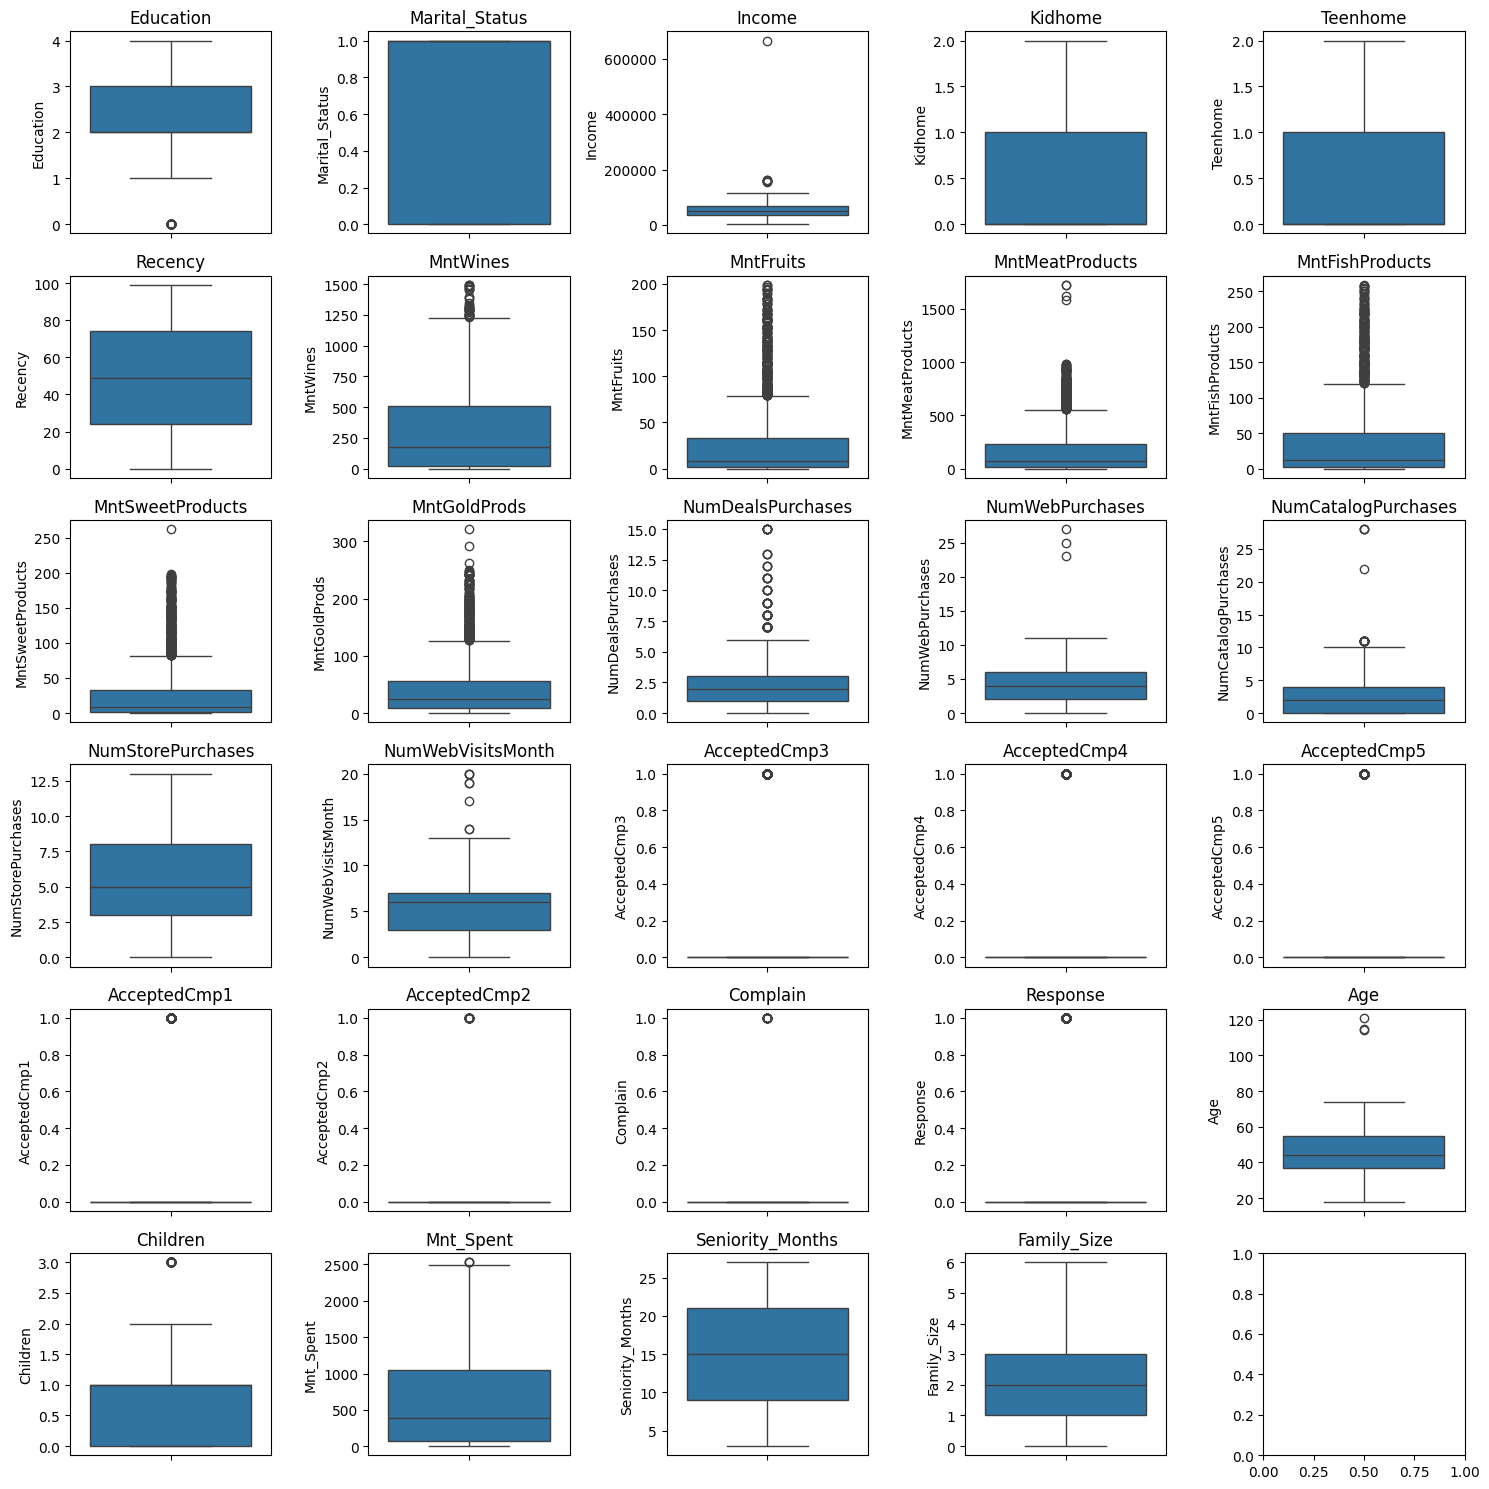

In [313]:
#Graficamos boxplot de todas las variables
var_cat = df_proc.columns
num_plots = len(var_cat)
rows = 6
cols = num_plots // rows + (num_plots % rows > 0) # Número de columnas deseadas

fig, axes = plt.subplots(rows, cols, figsize=(15,15))

for i, col in enumerate(var_cat):
  ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]  # Obtén el eje correspondiente
  sns.boxplot(data=df_proc, y=col, ax=ax)
  ax.set_title(col) # Opcional: establece el título de cada gráfico

plt.tight_layout() # Ajusta el espaciado entre los gráficos
plt.show()

In [314]:
print('df antes de eliminar outliers de Age',df_proc.shape)
df_proc = df_proc[df_proc['Age']<80] # Eliminamos los outliers de Age
print('df después de eliminar outliers de Age',df_proc.shape, '\n')
print('df antes de eliminar outliers de Income',df_proc.shape)
df_proc = df_proc[df_proc['Income']<220000] # Eliminamos los outliers de Income
print('df después de eliminar outliers de Income',df_proc.shape, '\n')

df antes de eliminar outliers de Age (2216, 29)
df después de eliminar outliers de Age (2213, 29) 

df antes de eliminar outliers de Income (2213, 29)
df después de eliminar outliers de Income (2212, 29) 



Graficamos correlación de todas las vaiables

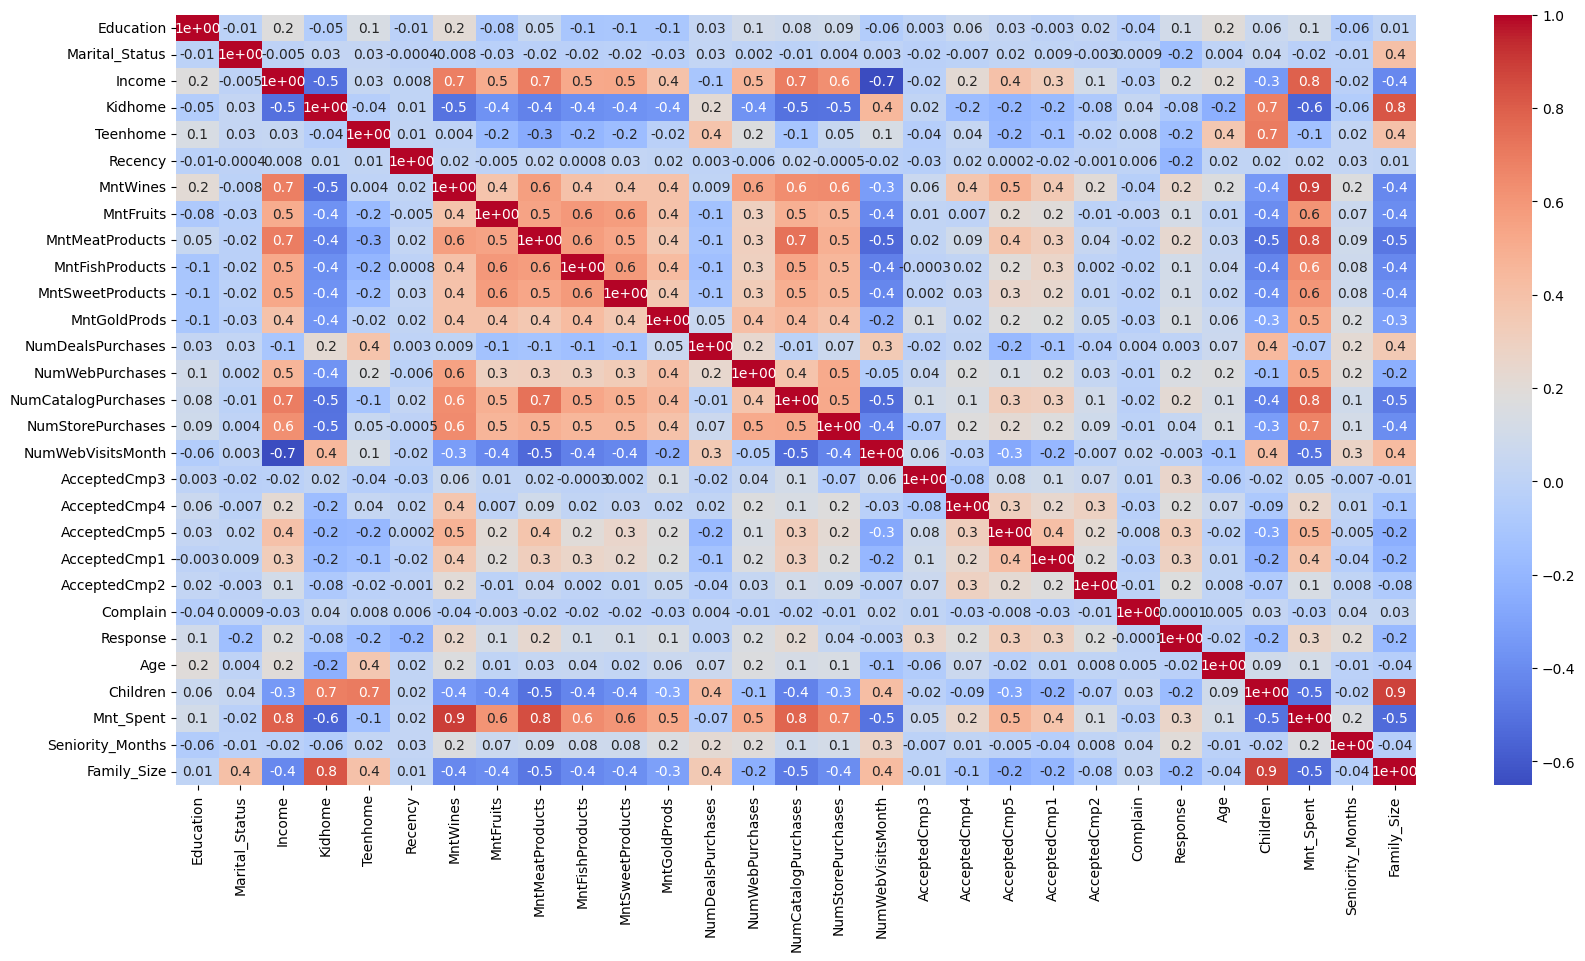

In [315]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df_proc.corr(), annot=True, cmap='coolwarm', fmt='0.1')
plt.show()

### Escalar datos

In [316]:
from sklearn.preprocessing import StandardScaler

In [317]:
# Escalamos los datos excepto las de las variables 'categóricas' como
# ['Education',
#  'Marital_Status',
#  'AcceptedCmp3',
#  'AcceptedCmp4',
#  'AcceptedCmp5',
#  'AcceptedCmp1',
#  'AcceptedCmp2',
#  'Complain',
#  'Response']

scaler  = StandardScaler()  # Objeto con función escalamiento
bin_var = [
    'Education',
    'Marital_Status',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'Complain',
    'Response'
]
df_proc_scaled = scaler.fit_transform(df_proc.drop(bin_var, axis=1))

In [318]:
print(df_proc_scaled)
print(df_proc_scaled.shape)

[[ 0.28710487 -0.82275354 -0.92969866 ...  1.67624537  1.4771759
  -1.5715488 ]
 [-0.26088203  1.04002111  0.90809708 ... -0.96329696 -1.18378576
   0.74544694]
 [ 0.9131964  -0.82275354 -0.92969866 ...  0.28011009 -0.14896734
  -0.79921689]
 ...
 [ 0.23334696 -0.82275354 -0.92969866 ...  1.05205171 -1.03595456
  -1.5715488 ]
 [ 0.80317156 -0.82275354  0.90809708 ...  0.39133608 -1.03595456
  -0.02688497]
 [ 0.04229031  1.04002111  0.90809708 ... -0.72258398  1.32934469
   1.51777886]]
(2212, 20)


In [319]:
# Tomamos df_proc_scaled y lo convertimos a DataFrame, y le ponemos los nombres de las columnas.
df_proc_scaled = pd.DataFrame(df_proc_scaled, columns=df_proc.drop(bin_var, axis=1).columns)
df_proc_scaled

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,Mnt_Spent,Seniority_Months,Family_Size
0,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,-1.264598,1.676245,1.477176,-1.571549
1,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,1.404572,-0.963297,-1.183786,0.745447
2,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,-1.264598,0.280110,-0.148967,-0.799217
3,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,0.069987,-0.920135,-1.035955,0.745447
4,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-1.033114,0.069987,-0.307562,-0.888123,0.745447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,1.791619,0.111982,-0.555814,-0.132545,0.163575,0.069987,1.218061,0.146695,-0.026885
2208,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,1.426865,-0.229679,-0.248141,0.692181,1.958607,2.739158,-0.271040,-1.627279,3.062443
2209,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,-0.761665,0.111982,2.213242,0.279818,-1.033114,-1.264598,1.052052,-1.035955,-1.571549
2210,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,0.697355,0.795303,1.290224,-0.957271,1.103830,0.069987,0.391336,-1.035955,-0.026885


### Aplicamos PCA (Princpal components Analysis)

In [320]:
from sklearn.decomposition import PCA

In [321]:
# Definimos objeto con función PCA,
pca = PCA()
pca.fit(df_proc_scaled)
pca_data_scaled = pca.transform(df_proc_scaled)
print(pca_data_scaled)
print(pca_data_scaled.shape)

[[ 4.64716156e+00  2.61530769e-01  2.04390638e+00 ...  3.53966729e-01
  -3.49959456e-16 -2.46513019e-16]
 [-2.92231090e+00  2.63106736e-01 -2.12761711e+00 ...  4.60719434e-01
   7.53213512e-17  1.57144869e-16]
 [ 2.32236994e+00 -7.05962752e-01 -8.39191207e-02 ... -2.52334900e-01
  -1.36894974e-16  2.17114098e-16]
 ...
 [ 2.23657122e+00 -1.48053190e+00  7.06512090e-02 ...  3.34687805e-01
  -4.62749473e-16 -2.26518870e-16]
 [ 1.87456739e+00  9.94881845e-01 -1.85051077e+00 ... -1.72511700e-01
   2.25810508e-17  6.16201548e-16]
 [-2.59095844e+00  1.76802310e+00 -1.65371088e-01 ... -1.55295976e-01
   2.17664291e-16  6.05249275e-16]]
(2212, 20)


Calculamos índice or ratio de varianza para decidir cuanta reducción de dimensionalidad requiero, es decir de todas las dimensiones del df, cuantas necesito

In [322]:
var = pca.explained_variance_ratio_
print(var)

# Resultado arroja un arreglo de 20 ratios de varianza así, co un índice o componente principal,
# con dos índices o compoenentes principales, y así sucexivamente hasta 20 índices o componentes principales

[3.98901992e-01 1.24429406e-01 7.31471080e-02 6.42336831e-02
 5.02422374e-02 4.27787224e-02 3.80270734e-02 3.19703367e-02
 2.90997335e-02 2.88195472e-02 2.25191490e-02 2.13561923e-02
 1.95379277e-02 1.73763028e-02 1.25068267e-02 1.19165866e-02
 8.73221258e-03 4.40496292e-03 3.86551219e-33 9.85368933e-34]


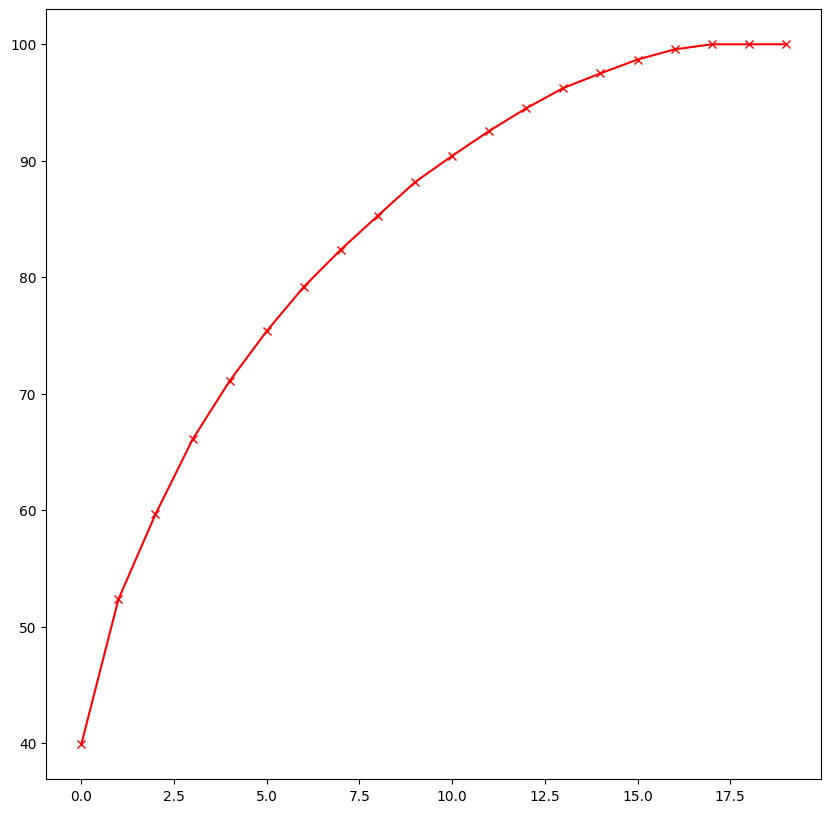

In [323]:
# calculamos la suma de los ratios de la varianza, en porcentaje
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

# En la gráfica las x sobre la línea son las cantidades de componentes princpales de 1 a 20
# y el eje vertical es el porcentaje de ratio de varianza.
# La gráfica arroja que cuando se dejan 10 componentes principales
# se tienen casi el 90% de mis variables,
# con 12.5 coonmp ppales se tendría aprox. el 95%
# Decidimos 10 componentes principales

In [324]:
# Seleccionamso trabajar con 10 PCA componentes principales seguimos...
pca_data_standard = pd.DataFrame(pca_data_scaled) # convertimos a DataFrame
pca_data_standard.drop([10,11,12,13,14,15,16,17,18,19], axis=1, inplace=True) # borramos dimensiones columnas que no necesito

In [325]:
pca_data_standard

,0,1,2,3,4,5,6,7,8,9
0,4.647162,0.261531,2.043906,-0.276585,0.494934,-1.087399,-1.484330,0.576533,1.678169,0.328577
1,-2.922311,0.263107,-2.127617,0.498327,-0.324029,-0.339987,-0.630298,0.449962,0.359611,-0.104776
2,2.322370,-0.705963,-0.083919,-0.861971,-0.919585,-0.250638,0.593163,-0.859193,0.597697,-0.581235
3,-2.717825,-1.597985,0.289107,0.809162,-0.936979,0.524030,0.686820,-0.118195,0.232129,0.065458
4,-0.579854,0.026917,0.530177,1.736351,1.194566,0.699914,1.112401,-0.360869,0.973145,0.956882
...,...,...,...,...,...,...,...,...,...,...
2207,2.708900,1.780639,0.691050,-0.115713,-0.153258,-1.785915,1.692301,1.525436,-0.291848,-1.709975
2208,-3.034931,4.310523,-1.404777,2.175390,-0.123077,1.072857,0.151771,0.189889,2.677332,-0.528564
2209,2.236571,-1.480532,0.070651,-0.657505,1.294507,1.725126,1.164897,-1.002336,-0.245375,-0.121139
2210,1.874567,0.994882,-1.850511,-0.258445,-1.505550,-0.185205,0.292736,0.075182,0.080705,-0.011866


# CLUSTERING

### Importamos librerías para clustering

In [326]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## K-means

### K-means con PCA
Aplicamos KMeans sobre dataset que tiene reducción de dimensionalidad 'pca_data_standard'

In [327]:
# Com no sabemos el K, tenemos que iterar sobre distintos K, para encontar el apropiado.
sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
  km = KMeans(n_clusters= _, n_init=10) # aplicamos KMeans sobre los que estamos iterando
  y = km.fit_predict(pca_data_standard) # hacemos predicción
  sum_of_squared_distances.append(km.inertia_)   # el resultado de predicción de y, lo añadimos a sum_of_squared_distances para graficar el codo
  silhouette_scores.append(silhouette_score(pca_data_standard, y))

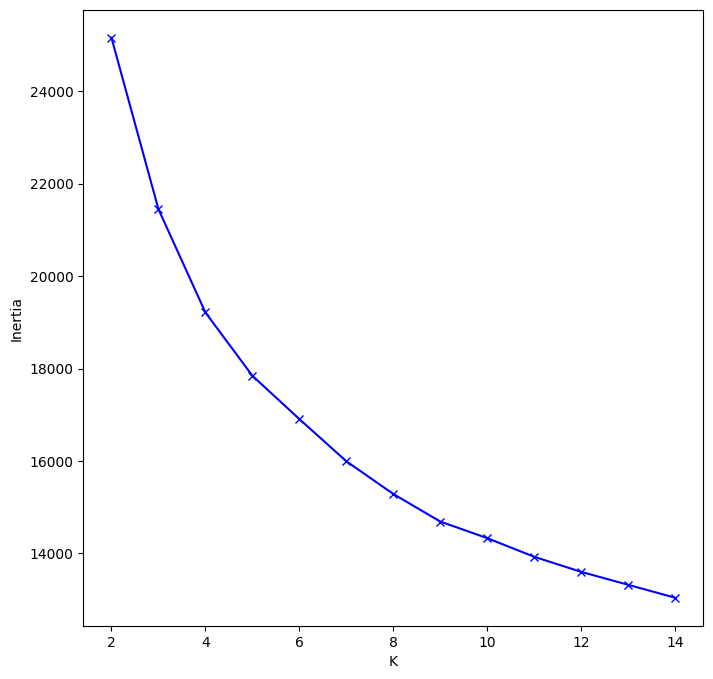

In [328]:
# Graficamos
fig = plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

# Grafica arroja que el K óptimo del codo está entre 5 y 6

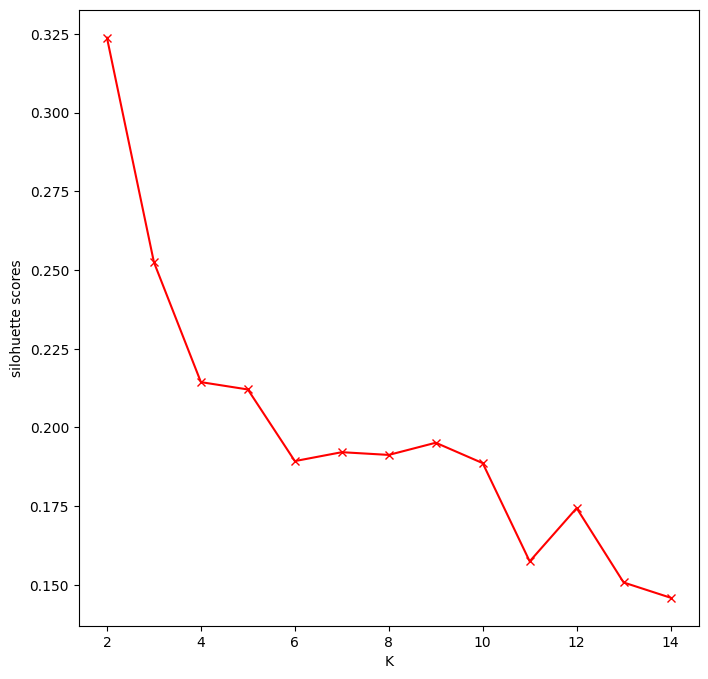

In [329]:
# confirmamos si K óptima está entre 4 y 5 con el coeficiente de silhoutte silueta
plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silohuette scores')
plt.show()

# La gráfica arroja que K =  4  es el K óptimo

In [330]:
# Aplicamos KMeans para cluster K = 3
km = KMeans(n_clusters=4, n_init=10)
y = km.fit_predict(pca_data_standard) # hacemos predicción
print('Índice de silhouette = ', silhouette_score(pca_data_standard, y))  # imprimimos índice silueta de pca_standard contra la y prediciones
df_proc['k_means_pca'] = y  # guardamos valore de k_means_pca en df

Índice de silhouette =  0.21433828664428295


### K-means sin PCA (principal componetns analysis)
Aplicamos KMeans sobre dataset que No tiene reducción de dimensionalidad 'df_proc_scaled'

In [331]:
# como no sabemos el K, tenemos que iterar sobre distintos K, para encontrar el apropiado.
sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
  km = KMeans(n_clusters= _, n_init=10) # acplicamos KMEANS sobre lo que estamos iternado
  y = km.fit_predict(df_proc_scaled)  # hacemos predicción sobre df que no tien pca
  sum_of_squared_distances.append(km.inertia_) # el resultados de la predicción y, lo añadimos a sum_of_square para la gráfica del codo
  silhouette_scores.append(silhouette_score(df_proc_scaled, y)) # obtenemos los coeficientes de silueta


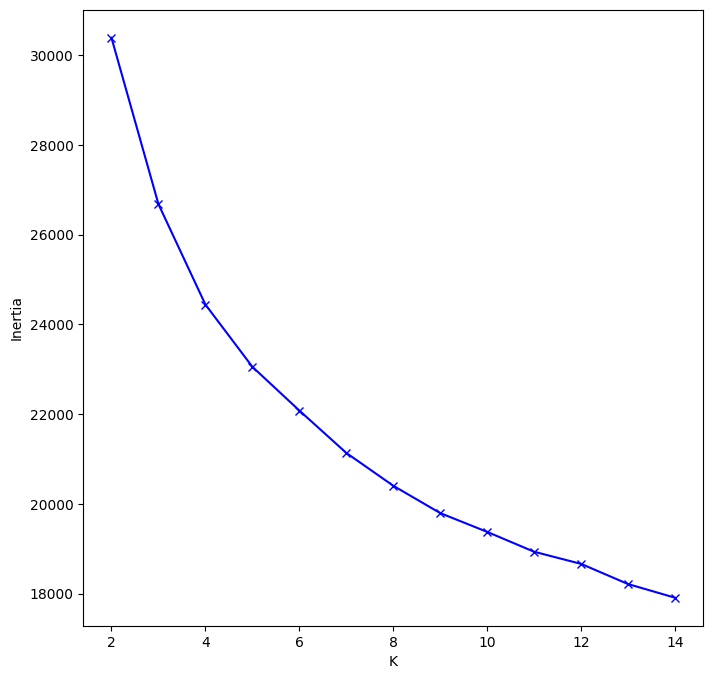

In [332]:
# Graficamos el codo
fig = plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

# La gráfica arroja que el K óptimo del codo está entre 4 y 5

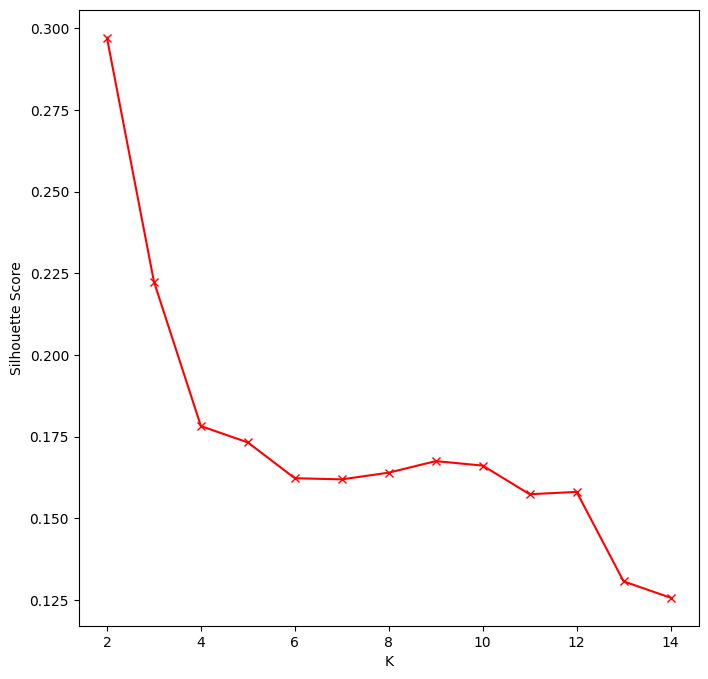

In [333]:
# Confirmamos si K óptima está entre 4 y 5 con el coeficiente de silhouette
plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [334]:
# Aplicamos KMeans para clusters K = 4
km = KMeans(n_clusters=4, n_init=10) # aplicamos Kmeans
y = km.fit_predict(df_proc_scaled)  #  hacemos predicción
print('Índice de silhouette sin pca y K igual a 5 = ', silhouette_score(df_proc_scaled, y)) # #imprimimos índice silhouette sin df proc standar contra predicciones de y
plt.show()

df_proc['k_means'] = y  # guardamos valores de k_means sin pca en df

Índice de silhouette sin pca y K igual a 5 =  0.17797994271919537


# Agglomerative hierarchical clustering

Graficaremos nuestro dendrograma

### Con PCA Agglomerative hierarchical clustering

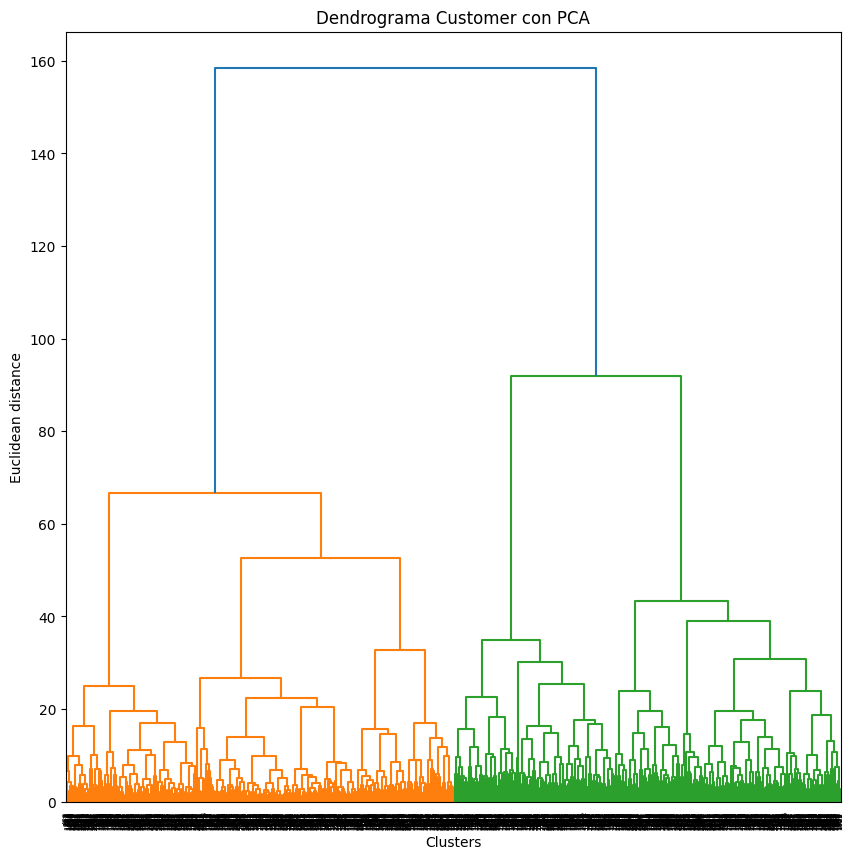

In [335]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))
plt.title('Dendrograma Customer con PCA')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [336]:
# Trabajaremos sobre la separación de 2 y 3 líneas o clusters del dendrograma para evaluar resultados

# 3 clusters o líneas del dendrograma
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)  # realizamos predicción
print('El coeficiente de silhouette es: ', silhouette_score(pca_data_standard, y_hc)) # imprimimos coeficiente de esilueta
df_proc['hc_pca'] = y_hc #  agregamos a df_coutnry coolumna hc_pca = hierarchical clustering con pca

El coeficiente de silhouette es:  0.24685438768009813


In [337]:
# Trabajaremos sobre la separación de 2 y 3 líneas o clusters del dendrograma para evaluar resultados

# 2 clusters o líneas del dendrograma
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)  # realizamos predicción
print('El coeficiente de silhouette es: ', silhouette_score(pca_data_standard, y_hc)) # imprimimos coeficiente de esilueta
df_proc['hc_pca'] = y_hc #  agregamos a df_coutnry coolumna hc_pca = hierarchical clustering con pca

El coeficiente de silhouette es:  0.2874802249295978


### Sin PCA Agglomerative hierarchical clustering

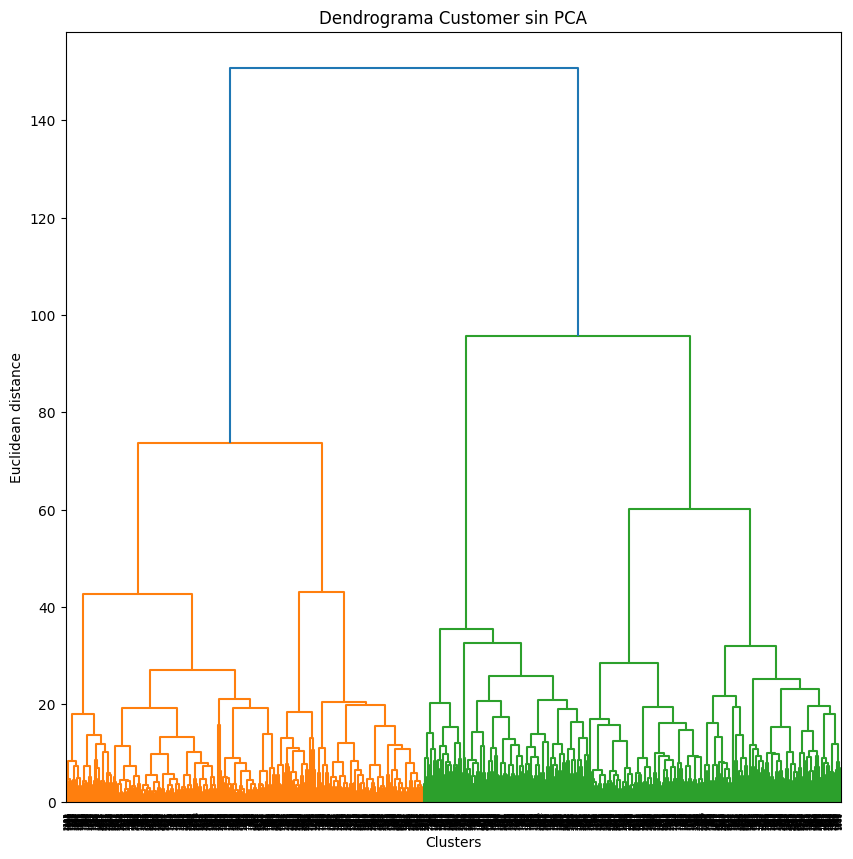

In [338]:
# grafiamos dendrograma don datos escalados sin pca
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_proc_scaled, method='ward'))
plt.title('Dendrograma Customer sin PCA')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [339]:
# Trabajaremos sobre la separación de 2 y 3 líneas o cluster del dendrograma para evaluar resultados

# 3 clusters
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_proc_scaled) # realizamos predicción
print('El coeficiente de silhouette por hierarquical sin pca es:', silhouette_score(df_proc_scaled, y_hc)) # imprimimos coeficiente d esilueta
df_proc['hc'] = y_hc #  agregamos a df_coutnry columna hc_pca = hierarchical clustering sin pca


El coeficiente de silhouette por hierarquical sin pca es: 0.1933763345491236


In [340]:
# Trabajaremos sobre la separación de 2 y 3 líneas o cluster del dendrograma para evaluar resultados

# 2 clusters
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_proc_scaled) # realizamos predicción
print('El coeficiente de silhouette por hierarquical sin pca es:', silhouette_score(df_proc_scaled, y_hc)) # imprimimos coeficiente d esilueta
df_proc['hc'] = y_hc #  agregamos a df_coutnry columna hc_pca = hierarchical clustering sin pca


El coeficiente de silhouette por hierarquical sin pca es: 0.2295627607231564


# DBSCAN

### DBSCAN con PCA

In [341]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=2) # definimos objeto con número de vecinos más cercanos = 2
neighbors_fit = neighbors.fit(pca_data_standard)  # entrenamos con datos pca_data_standard
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

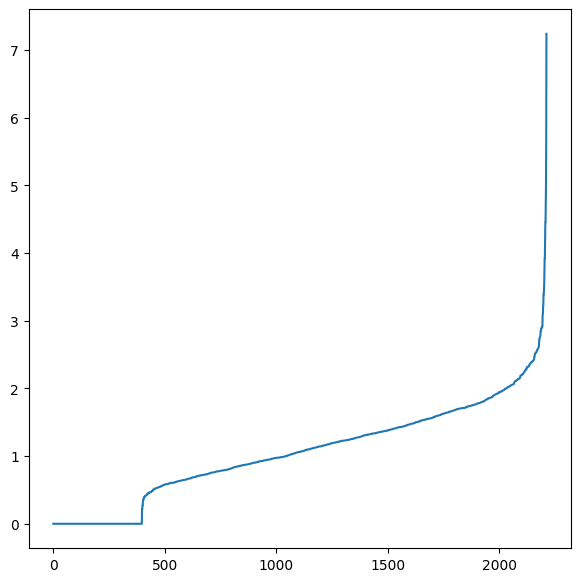

In [342]:
# Graficamos
distances = np.sort(distances, axis=0)  # ordenamos las distancias por las filas
distances = distances[:,1]  # tomaos el valor o columna de la distancia del vecino más cercano.
fig = plt.figure(figsize=(7,7))
plt.plot(distances)
plt.show()

In [343]:
eps_values = np.arange(1.5, 2.5, 0.10)  # creamos nuestro rango de valores de eps radio
min_samples = np.arange(3,8)

In [344]:
from itertools import product

dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
silueta_score = []

for p in dbscan_params:
  y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
  try:
    silueta_score.append(silhouette_score(pca_data_standard, y_dbscan))
  except:
    silueta_score.append(0)
  no_of_clusters.append(len(np.unique(y_dbscan)))

In [345]:
# hacemos los pivots para verlo matricialmente y evaluar
df_param_tunning = pd.DataFrame.from_records(dbscan_params, columns=['Eps', 'Min_samples'])
df_param_tunning['silueta_score'] = silueta_score
df_param_tunning['n_clusters'] = no_of_clusters

In [346]:
pivot_1 = pd.pivot_table(df_param_tunning, values='silueta_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')


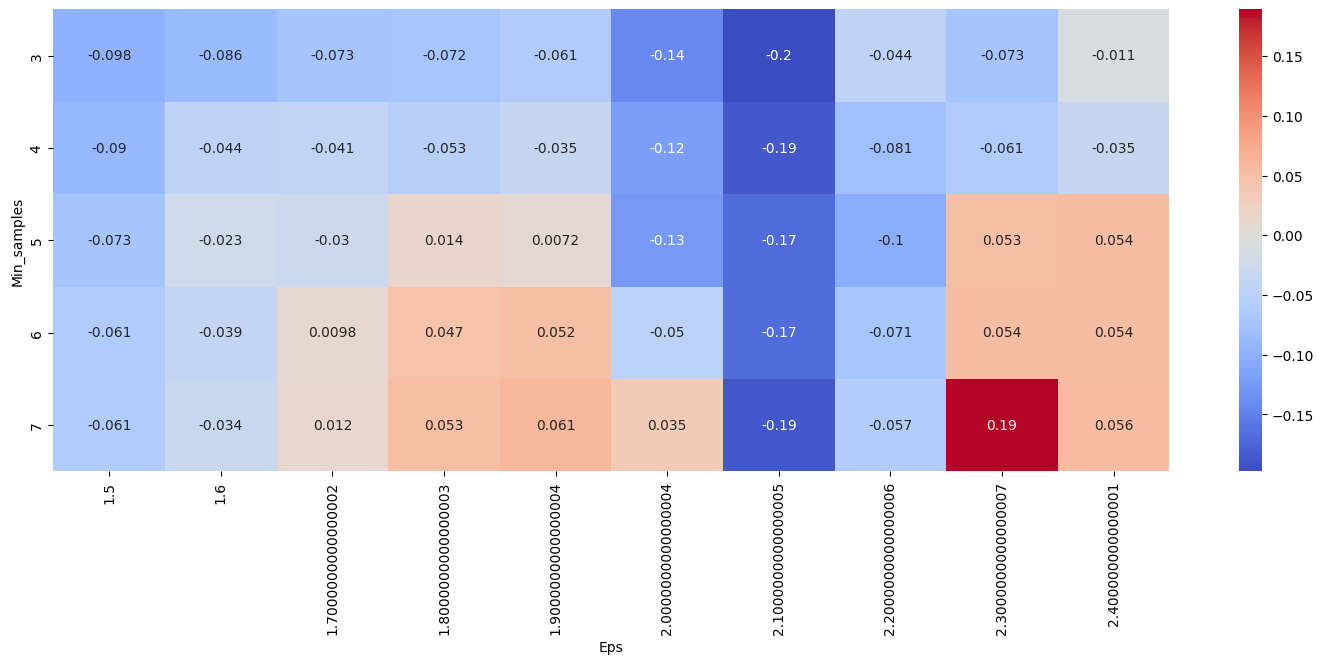

In [347]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

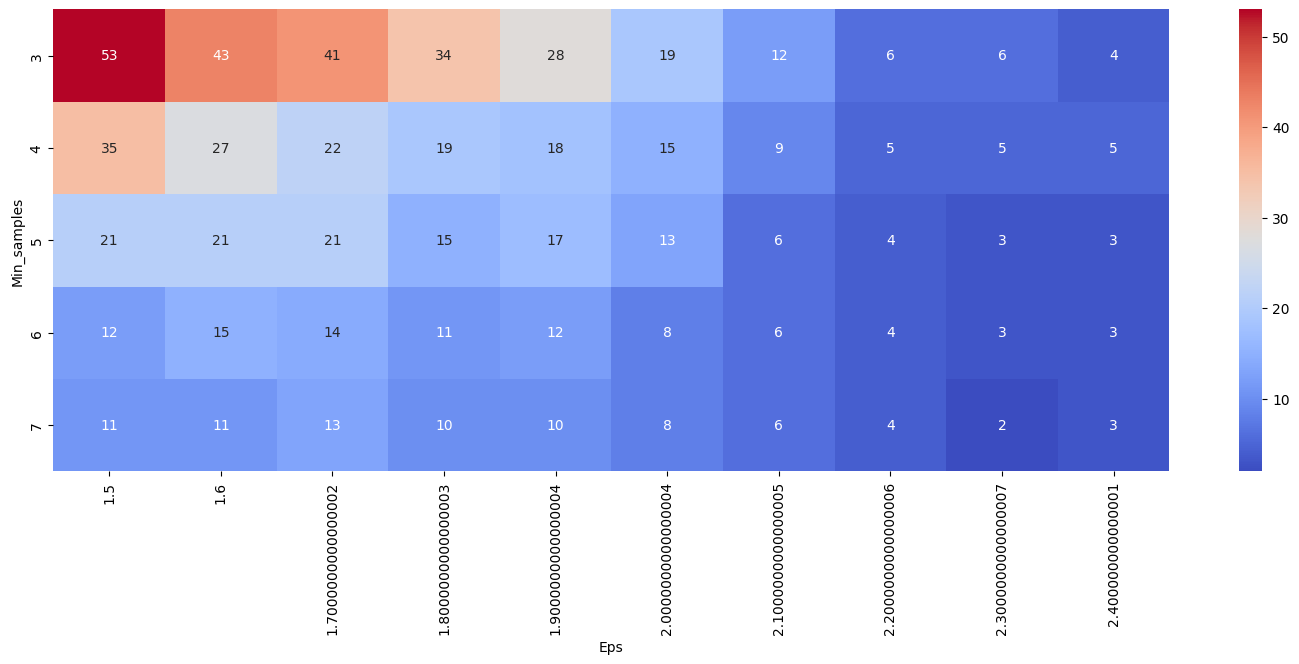

In [348]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [349]:
# Al analizar la gráfica para coef silueta de 0.19 (color rojo), y min_samples = 7 vecinos cercanos
# se tiene valor de K cluster = 2 en segunda gráfica
# Por lo tando escogemos valor de eps = 2.300000
dbscan_train = DBSCAN(eps=2.3, min_samples=7)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_dbscan))
df_proc['dbscan-pca'] = y_dbscan

# el resultado de índice de silueta arroja valor similar al de figura no. 1 = 0.19

0.18933646612285532


### DBSCAN sin PCA

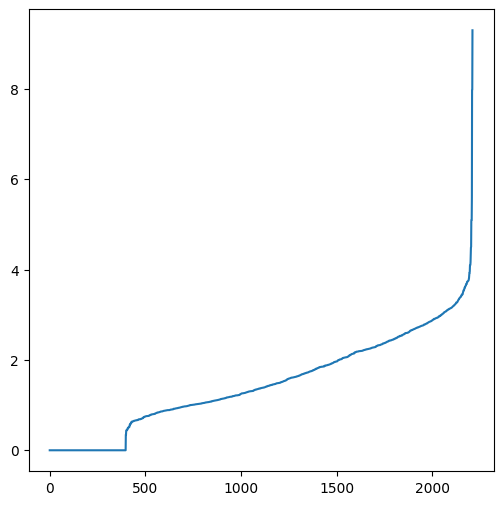

In [350]:
# Vamos a graficar rodilla pero datos sin pca
neighbors = NearestNeighbors(n_neighbors=2) # definimos objeto con función NearestNeighbors con vecinos = 2
neighbors_fit = neighbors.fit(df_proc_scaled) # calculamos los vecinos más cercanos data sin pca df_proc_scaled
distances, indices = neighbors_fit.kneighbors(df_proc_scaled)

distances = np.sort(distances, axis=0) # ordenamos por filas las distancias de los vecinos más cercanos
distances = distances[:,1] # obtenenmos columna del valor más cercano
fig = plt.figure(figsize=(6,6))
plt.plot(distances)
plt.show()

# gráfica arroja que rodilla está entre eps = y = 2 y 4

In [351]:
eps_values = np.arange(2, 4, 0.10)  # generamos nuestro rango de eps entre 2 y 4
min_samples = np.arange(3, 8)  # escogemos como número de samples o vecinos cercanos entre 3 y 10

In [352]:
from itertools import product
dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
silueta_score = []

for p in dbscan_params:
  y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_proc_scaled)
  try:
    silueta_score.append(silhouette_score(df_proc_scaled, y_dbscan))
  except:
    silueta_score.append(0)
  no_of_clusters.append(len(np.unique(y_dbscan)))

In [353]:
# creamos los pivots para graficar matricialmente y avaluar
df_param_tunning = pd.DataFrame.from_records(dbscan_params, columns=['Eps', 'Min_samples'])
df_param_tunning['silueta_score'] = silueta_score
df_param_tunning['n_clusters'] = no_of_clusters

In [354]:
pivot_1 = pd.pivot_table(df_param_tunning, values='silueta_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

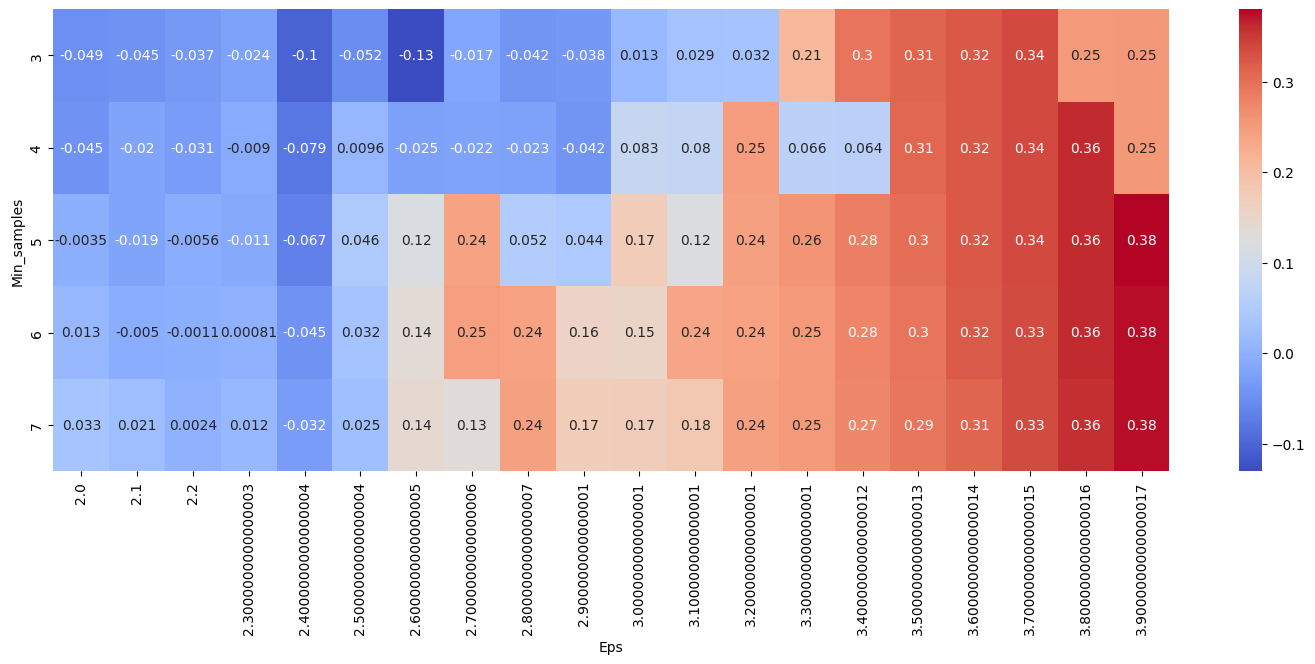

In [355]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

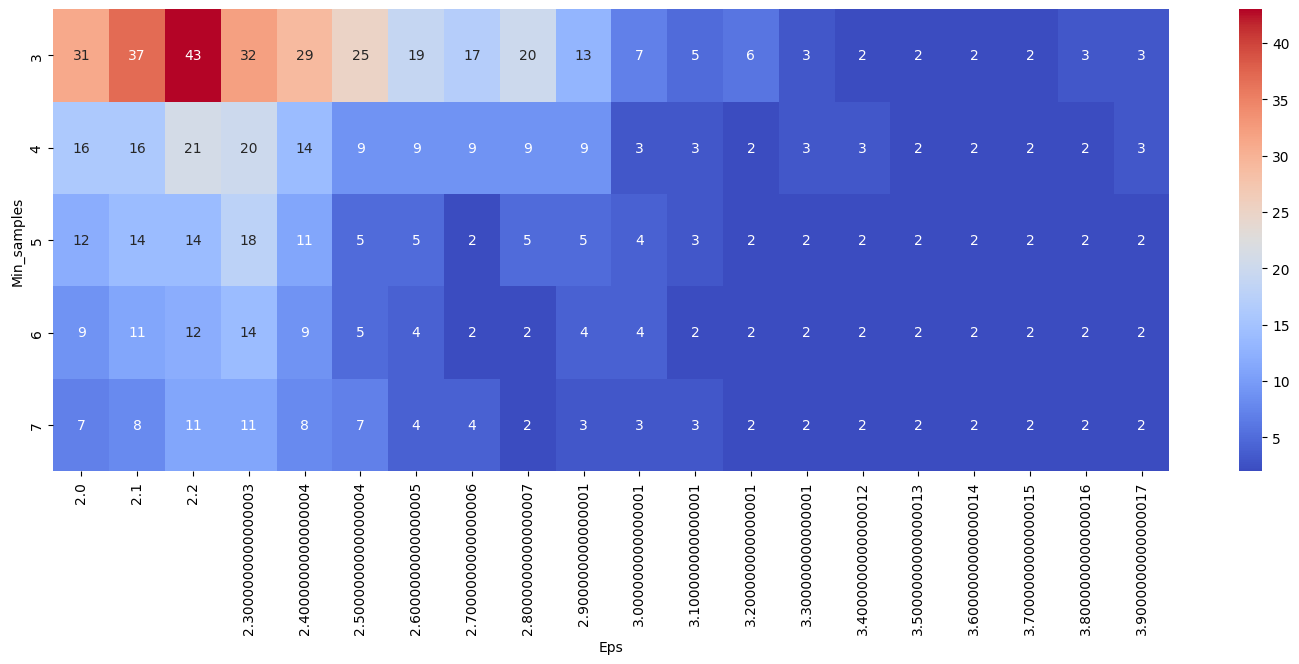

In [356]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [366]:
# Al analizar la gráfica para coef silueta de 0.38 (color rojo), y min_samples = 5 vecinos cercanos
# se tiene valor de K cluster = 2 en segunda gráfica
# Por lo tando escogemos valor de eps = 3.9000
dbscan_train = DBSCAN(eps=3.8, min_samples=7)
y_dbscan = dbscan_train.fit_predict(df_proc_scaled)
print(silhouette_score(df_proc_scaled, y_dbscan))
df_proc['dbscan'] = y_dbscan

# el resultado arroja valor de silueta similar al 0.39 de eps

0.3576227809866302


In [369]:
df_proc['hc_pca'].value_counts()

hc_pca
1    1110
0    1102
Name: count, dtype: int64

# Evaluación de Resultados

Graficamos los 6 modelos k_means, k_mans con pca, hc, hc con  pca, DBSCAN, DBSCAN sin pca.

In [358]:
df_proc.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Children', 'Mnt_Spent',
       'Seniority_Months', 'Family_Size', 'k_means_pca', 'k_means', 'hc_pca',
       'hc', 'dbscan-pca', 'dbscan'],
      dtype='object')

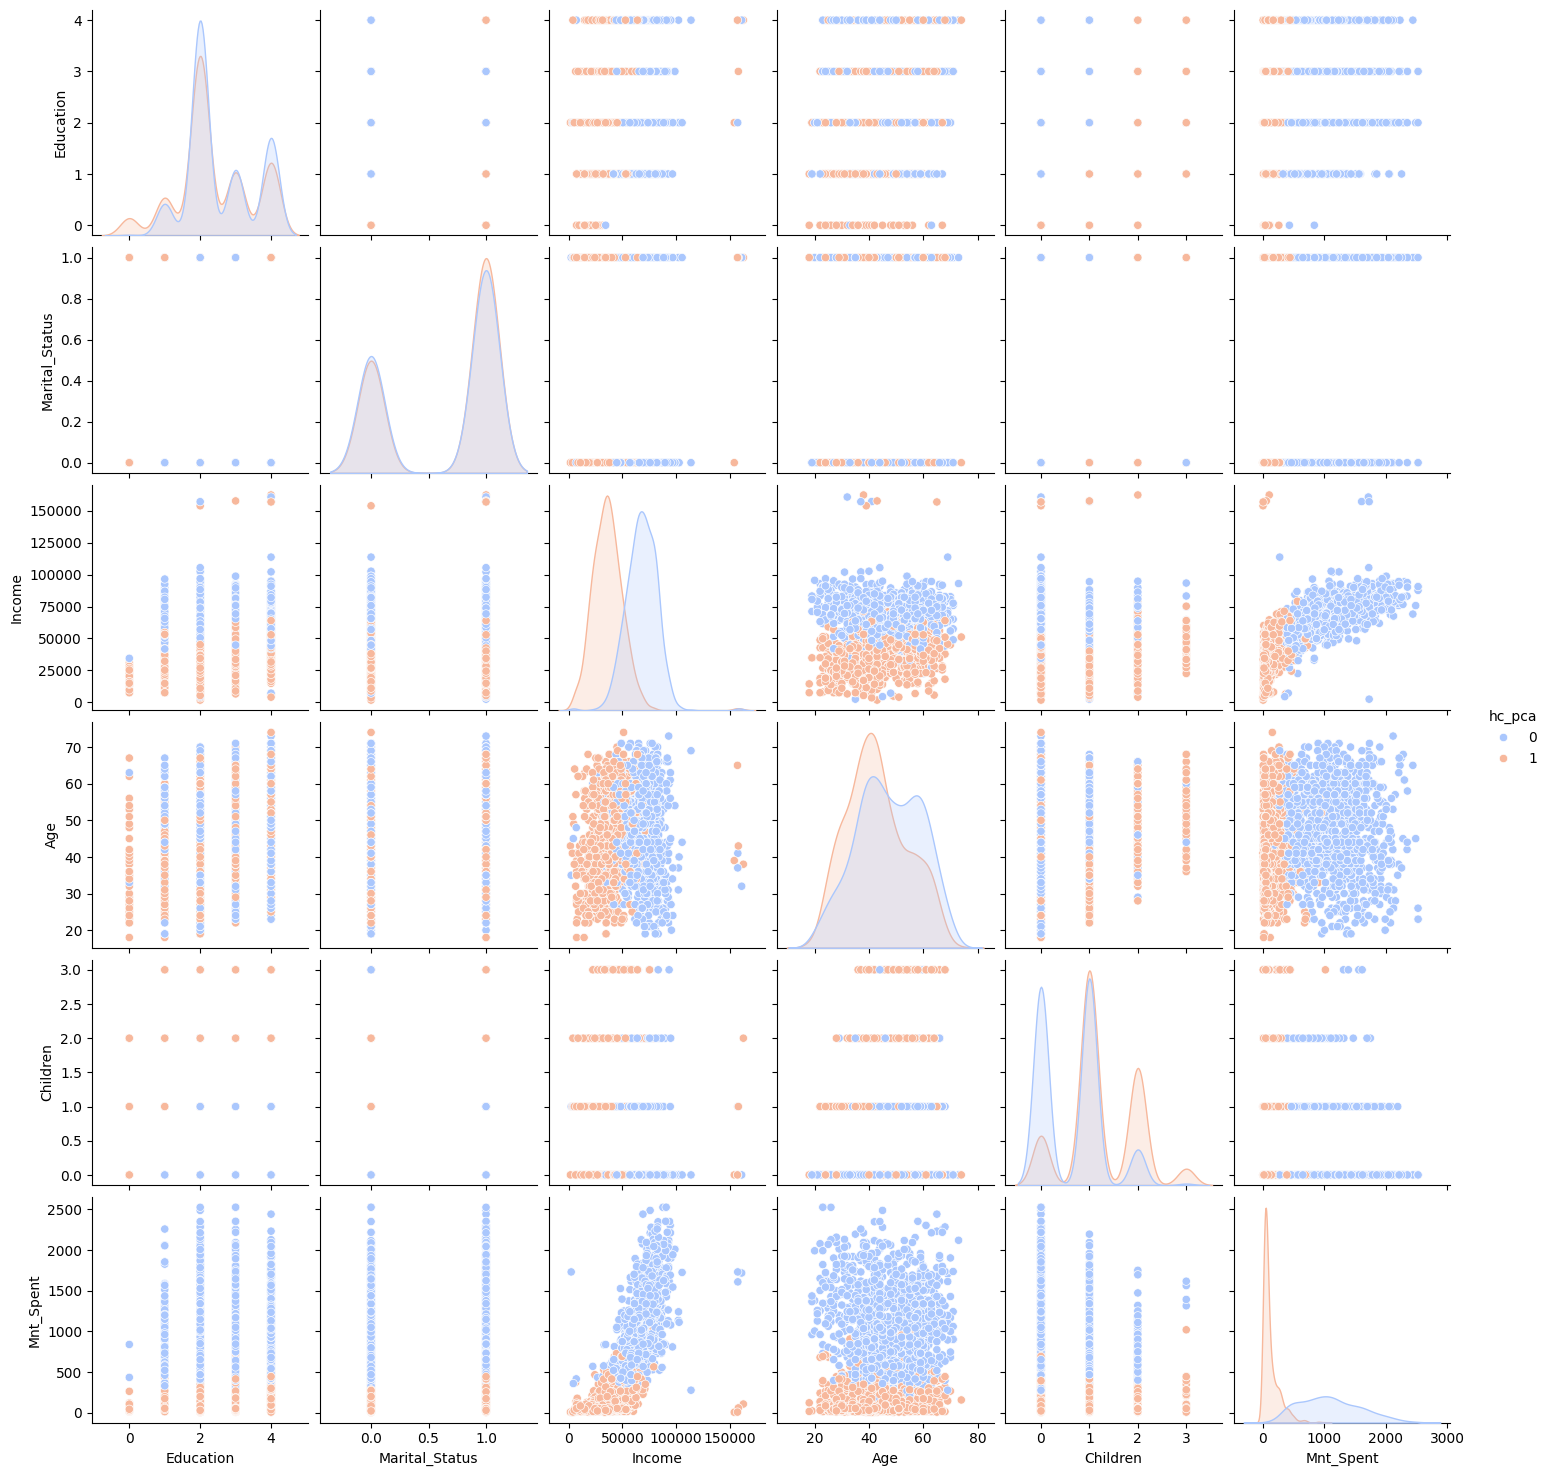

In [374]:
# solo vamos a graficar las columnas 'Education', 'Marital_Status', 'Income', 'Age', 'Children','Mnt_Spent'
sns.pairplot(data=df_proc[['Education', 'Marital_Status', 'Income', 'Age', 'Children','Mnt_Spent', 'hc_pca']], hue='hc_pca', palette='coolwarm')